In [1]:
import matplotlib.pyplot as plt 
from matplotlib.ticker import FuncFormatter
import numpy as np

#%% 

from astropy import constants as ast

m_sol = ast.M_sun.cgs.value   # masa del sol en gramos
G = ast.G.cgs.value           #constante de gravitacion universal en cgs
c = ast.c.cgs.value           #velocidad de la luz en cgs
#%%


from scipy import constants as sci
pi = sci.pi

#%%
eta_0 = 2.96e12 #son aproximadamente los 47k anios donde domina la rad
eta_b = 21969.3   #escala del bounce
a_b = 7.41155e-9 #factor de normalizacion del factor de escala
xini = eta_0/eta_b  #cte inicial en funcion de x

#definimos cte de normalizacion 
rho_rad_ini = (3*c**2/(8*pi*G))*(1/(a_b*eta_b)**2)*xini**2*(1+xini**2)**(-3)  #dens de rad inicial [erg/cm^3]
beta =1e-10
rho_bh_ini = beta*rho_rad_ini   

alfa = 2.36
M_min = 1e16
M_max = m_sol*1e6

cteA = (rho_bh_ini*(2-alfa))/(c**2*(M_max**(2-alfa)-M_min**(2-alfa)))


In [9]:
alfa = 2
M_min = 1e16
M_max = m_sol*1e6

cteA = rho_bh_ini/(c**2*np.log(M_max/M_min))

In [2]:
import pandas as pd

from fractions import Fraction

In [3]:
num_eta = 100000

eta_pos = np.logspace(-20, 13, num_eta)
eta_neg = -eta_pos[::-1] 
eta_int = np.concatenate((eta_neg,[0], eta_pos))
x_int = eta_int/eta_b

In [4]:
rho_bh = np.zeros_like(eta_int) 

Nm = 100
Masas = np.logspace(np.log10(M_min), np.log10(M_max),Nm)

hlog = (M_max/M_min)**(1/(Nm-1))

i = 0
for x in x_int:
    a = a_b*(1+x**2)**(1/2) #factor de escala
    for M in Masas:
        M_i = M*a
        N_i = cteA*M**(-alfa)*a**(-3)   #densidad inicial de bhs en el bloque i

        delta = M*(hlog-1)

        rho_bh[i] = rho_bh[i]+ N_i*M_i*c**2*delta
        
    i = i+1

rho_bh_norm = rho_bh/rho_bh_ini

In [7]:
print(x_int[100000])

print(rho_bh[100000])

0.0
489315406.65395343


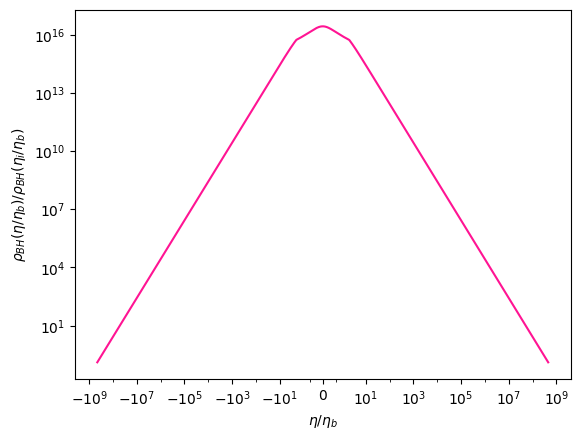

In [5]:
# plot results
fig, ax = plt.subplots()

plt.plot(x_int, rho_bh_norm, color='deeppink')
plt.xlabel(r'$\eta/\eta_b$')
plt.xscale('symlog')
plt.ylabel(r'$\rho_{BH}(\eta/\eta_b)/\rho_{BH}(\eta_{i}/\eta_b)$')
plt.yscale('log')

intervalo = [10**1, 10**3, 10**5, 10**7, 10**9]
int_neg = -np.array(intervalo)[::-1]

ticks_x = np.concatenate((int_neg, [0], intervalo))
ax.set_xticks(ticks_x)

plt.show()

In [6]:
ctes = (3*c**2)/(8*pi*G*a_b**2*eta_b**2)

rho_cf_solo = ctes*x_int**2*(1+x_int**2)**(-3)
rho_cf = rho_cf_solo -rho_bh

rho_cf_norm = rho_cf/(rho_rad_ini-rho_bh_ini)

/tmp/ipykernel_30459/1074250634.py:12: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axhline(y=0, color='grey', linestyle='--')


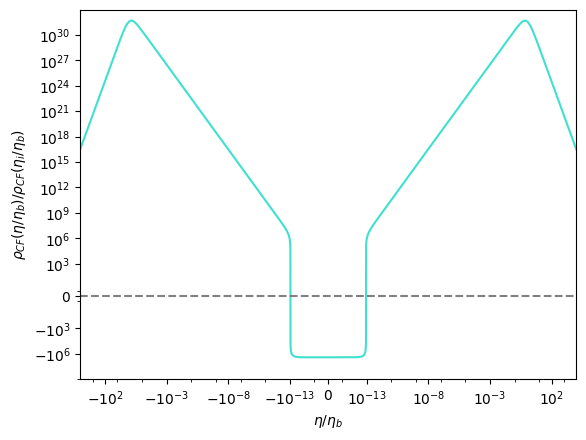

In [11]:
# plot results

fig, ax = plt.subplots()

plt.plot(x_int, rho_cf_norm, color = 'turquoise')
plt.xlabel(r'$\eta/\eta_b$')
plt.ylim([-1e9, 1e33])
plt.xlim([-1e4, 1e4])
plt.xscale('symlog', linthresh=0.000000000000001)
plt.ylabel(r'$\rho_{CF}(\eta/\eta_b)/\rho_{CF}(\eta_{i}/\eta_b)$')
plt.yscale('symlog')
plt.axhline(y=0, color='grey', linestyle='--')

#plt.legend()
#plt.legend(loc='upper left',bbox_to_anchor=(0.05, 0.94) )

intervalo = [ 1e-13, 1e-8, 1e-3, 1e2]
int_neg = -np.array(intervalo)[::-1]

ticks_x = np.concatenate((int_neg, [0], intervalo))
ax.set_xticks(ticks_x)

ticks_y = [ -1e6, -1e3, 0, 1e3, 1e6, 1e12, 1e18, 1e24, 1e30, 1e9, 1e15, 1e21, 1e27]
ax.set_yticks(ticks_y)

plt.show()

In [16]:
print(x_int[100000])

print(rho_cf[100000])

print(rho_cf_norm[100000])

0.0
-489315406.65395343
-2659648.868808698


In [12]:
#presion 

#primero defino la derivda de la densidad del fluido cosmologico

def der_rho(rho, etavar, k):
    drho = (rho[k+1] - rho[k])/(etavar[k+1]-etavar[k])
    return drho

der_rho_cf = np.zeros_like(eta_int) 
for k in range(len(eta_int)-1):
    der_rho_cf[k]= der_rho(rho_cf, x_int, k)


#defino Q

Q_inter = np.zeros_like(eta_int) 

a_vector = a_b*(1+x_int**2)**(1/2) #factor de escala definido como vector

j = 1
for i in range(len(x_int) - 1):  
    x = x_int[i]  
    a = a_b * (1 + x**2)**(1/2)  # factor de escala
    for M in Masas:
        M_i = M * a
        N_0 = cteA * M**(-alfa)

        dNdeta = N_0 / (x_int[j] - x_int[j-1]) * (a_vector[j]**(-3) - a_vector[j-1]**(-3))

        delta = M * (hlog - 1)

        Q_inter[j] = Q_inter[j] + dNdeta * M_i * c**2 * delta

    j += 1 

P_cf = (1/3)*(eta_b/x_int)*(1+x_int**2)*(-Q_inter-(1/eta_b)*der_rho_cf)-rho_cf

/tmp/ipykernel_30459/4253838920.py:36: RuntimeWarning: divide by zero encountered in divide
  P_cf = (1/3)*(eta_b/x_int)*(1+x_int**2)*(-Q_inter-(1/eta_b)*der_rho_cf)-rho_cf
/tmp/ipykernel_30459/4253838920.py:36: RuntimeWarning: invalid value encountered in multiply
  P_cf = (1/3)*(eta_b/x_int)*(1+x_int**2)*(-Q_inter-(1/eta_b)*der_rho_cf)-rho_cf


In [46]:
P_norm = P_cf/(P_cf[0])

In [47]:
sign_change = np.where(np.diff(np.sign(P_norm)) != 0)[0]
print(sign_change)


[ 25781  85647  85648 ... 114351 174220 199999]


In [49]:
x_int[25781]

-1.4137372541580544

In [50]:
P_norm[25781]

3.8597908825330877e+30

In [51]:
P_norm[25782]

-9.653807248774377e+29

In [52]:
(x_int[25782] + x_int[25781])/2

-1.4132003365000536

In [55]:
print(P_norm[174220])
print(P_norm[174221])

-3.336281781949042e+30
1.4281648266887205e+30


In [56]:
(x_int[174221] + x_int[174220])/2

1.4153496399929448

In [77]:
P_cf[99989]

489315406.65395343

In [76]:
x_int[99989]

-4.586525512725028e-25

/tmp/ipykernel_30459/840861152.py:10: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axhline(y=0, color='lightgrey', linestyle='--')


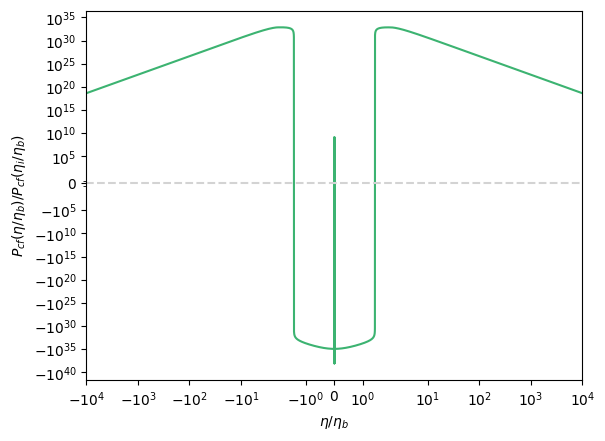

In [21]:
# plot results

fig, ax = plt.subplots()

plt.plot(x_int, P_norm, color = 'mediumseagreen')
plt.xlabel(r'$\eta/\eta_b$')
plt.xscale('symlog')
plt.ylabel(r'$P_{cf}(\eta/\eta_b)/P_{cf}(\eta_i/\eta_b)$')
plt.yscale('symlog')
plt.axhline(y=0, color='lightgrey', linestyle='--')
plt.xlim([-1e4, 1e4])

ticks_y = [0, 1e5, 1e10, 1e15, 1e20, 1e25, 1e30, 1e35, -1e5, -1e10, -1e15, -1e20, -1e25, -1e30, -1e35, -1e40]
ax.set_yticks(ticks_y)


plt.show()

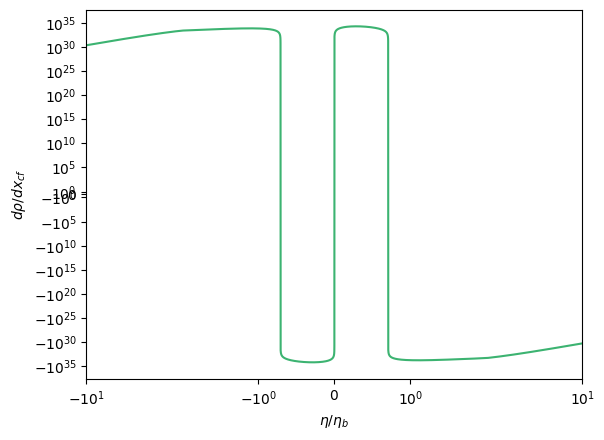

In [27]:

def der_rho(rho, etavar, k):
    drho = (rho[k+1] - rho[k])/(etavar[k+1]-etavar[k])
    return drho

der_rho_cf = np.zeros_like(eta_int) 
for k in range(len(eta_int)-1):
    der_rho_cf[k]= der_rho(rho_cf, x_int, k)


plt.plot(x_int, der_rho_cf, color = 'mediumseagreen')
plt.xlabel(r'$\eta/\eta_b$')
plt.xscale('symlog')
plt.ylabel(r'$d\rho/dx_{cf}$')
plt.yscale('symlog')
plt.xlim([-10,10])

plt.show()

In [25]:
der_rho_cf[100000]


0.0

/tmp/ipykernel_7178/3577193122.py:10: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axhline(y=0, color='lightgrey', linestyle='--')


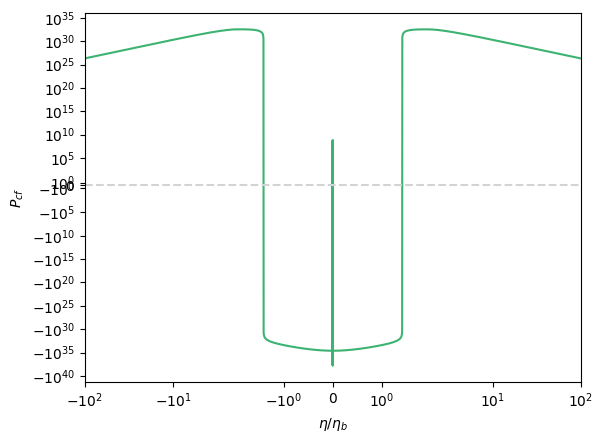

In [22]:
# plot results

fig, ax = plt.subplots()

plt.plot(x_int, P_cf, color = 'mediumseagreen')
plt.xlabel(r'$\eta/\eta_b$')
plt.xscale('symlog')
plt.ylabel(r'$P_{cf}$')
plt.yscale('symlog')
plt.axhline(y=0, color='lightgrey', linestyle='--')
plt.xlim([-1e2, 1e2])


plt.show()

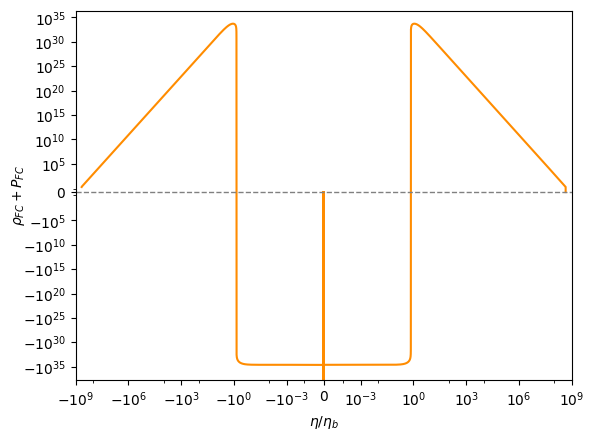

In [57]:
#condicion NEC


NEC = rho_cf + P_cf

fig, ax = plt.subplots()

plt.plot(x_int, NEC, color = 'darkorange')
plt.xlabel(r'$\eta/\eta_b$')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.ylabel(r'$\rho_{FC}+P_{FC}$', labelpad=-3)
plt.xscale('symlog', linthresh=0.0001)
plt.yscale('symlog')


intervalo = [1e-3, 1e0, 1e3, 1e6, 1e9]
int_neg = -np.array(intervalo)[::-1]

ticks_x = np.concatenate((int_neg, [0], intervalo))
ax.set_xticks(ticks_x)

intervalo_y = [1e5, 1e10, 1e15, 1e20, 1e25, 1e30, 1e35]
int_neg_y = -np.array(intervalo_y)[::-1]

ticks_y = np.concatenate((int_neg_y, [0], intervalo_y))
ax.set_yticks(ticks_y)

plt.show()

In [59]:
sign_change = np.where(np.diff(np.sign(NEC)) != 0)[0]
print(sign_change)


[ 26692  85647  85648 ... 114350 114351 173306]


In [65]:
print(NEC[26692])
print(NEC[26693])


4.7248028516756995e+30
-1.3479282349237443e+31


In [66]:
print(x_int[26692])

-0.7075150723218625


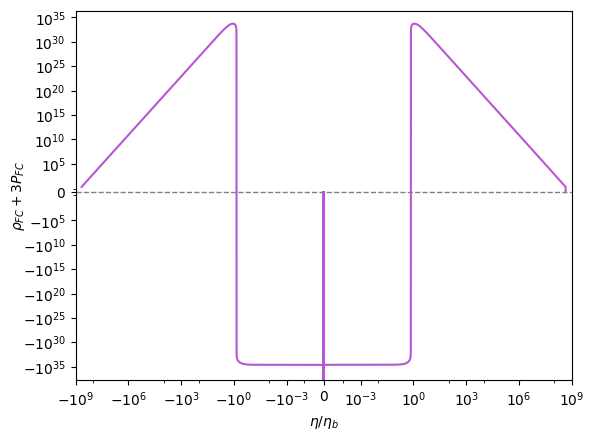

In [58]:
#condicion SEC

SEC = rho_cf + P_cf

fig, ax = plt.subplots()

plt.plot(x_int, SEC, color = 'mediumorchid')
plt.xlabel(r'$\eta/\eta_b$')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.ylabel(r'$\rho_{FC}+3P_{FC}$', labelpad=-3)
plt.xscale('symlog', linthresh=0.0001)
plt.yscale('symlog')
#plt.ylim([-1e35,1e35])

intervalo = [1e-3, 1e0, 1e3, 1e6, 1e9]
int_neg = -np.array(intervalo)[::-1]

ticks_x = np.concatenate((int_neg, [0], intervalo))
ax.set_xticks(ticks_x)

intervalo_y = [1e5, 1e10, 1e15, 1e20, 1e25, 1e30, 1e35]
int_neg_y = -np.array(intervalo_y)[::-1]

ticks_y = np.concatenate((int_neg_y, [0], intervalo_y))
ax.set_yticks(ticks_y)

plt.show()

In [69]:
print(SEC[26692])
print(SEC[26693])


4.7248028516756995e+30
-1.3479282349237443e+31


In [71]:
x_int[26692]

-0.7075150723218625

In [67]:
sign_change = np.where(np.diff(np.sign(SEC)) != 0)[0]
print(sign_change)

[ 26692  85647  85648 ... 114350 114351 173306]
